# 09 Static Data Visualization

> "Visualization gives you answers to questions you didn’t know you had." ~ Ben Schneiderman

> "There is no such thing as information overload. There is only bad design." ~ Edward Tufte

![data_oil](https://images.squarespace-cdn.com/content/v1/52ff7466e4b0ee230b3475c4/1585562766152-X6KYLT8NW2PTTDN2LA8X/ke17ZwdGBToddI8pDm48kI5LLFD310hRzGbHNqBNk9Z7gQa3H78H3Y0txjaiv_0fDoOvxcdMmMKkDsyUqMSsMWxHk725yiiHCCLfrh8O1z4YTzHvnKhyp6Da-NYroOW3ZGjoBKy3azqku80C789l0iXS6XmVv7bUJ418E8Yoc1iABP4NLB7hexwIF53MHR8F7LYJzTSroBaKfMCwLmZEoA/BBC+Infographic+Collection+1.27.jpg?format=2500w)

**Source:** [James Round](https://www.jamesrounddesign.com/)

# Notebook Outline

1. Introduction to matplotlib
    - First Approach, the MATLAB way
    - Second approach, the object oriented way
2. Introduction to seaborn

# 1. Introduction to matplotlib

![matplotlib](https://matplotlib.org/_static/logo2_compressed.svg)  
**Source:** https://matplotlib.org/

matplotlib was first released in 2003 and since then, it has become one of the most widely used data visualisation tools in data analytics, data science, and scientific computing. One of the main reasons for its popularity is the extensive customisation capabilities of the plots one can build with it. Almost any chart you can think of can be built with matplotlib. From 2D to 3D, static to interactive, from statistical to geographical, and the list goes on.

In this section, we will focus on how to get started creating data visualisations with matplotlib. We will cover the building blocks of this versatile tool, give examples of several use cases, and explore some data.

One thing to keep in mind is that, we will be focusing on the `pyplot` module of matplotlib, so when we import matplotlib into our session, we will do so with its industry alias of `plt`. For example, here are two common ways of importing matplotlib's pyplot module to our session.

```python

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

```

Another common functionality we would like to take advantage of is, that of being able to see our plots inline (i.e. inside our notebook as images) once we plot them. To do this, we will be using `%matplotlib inline`. This statement is called a magic command, and magic commands are calls within IPython that provide different functionaltities to either a particular cell, line of code, or the entire notebook. In the case of `%matplotlib inline`, a cell containing this call will only need to be run once and then we can move on to making plots to our heart's content knowing they will appear normally in our notebook.

There are two common ways for generating plots using matplotlib, an object oriented way and a `library.method()`-calling way. The latter resembles everything we have been doing so far with pandas and numpy (e.g. `pd.do_something()` and `np.something()`, respectively), while the former requires that we create an object to build our visualisations with. We will introduce both ways in this tutorial, but will favor the object oriented approach as it allows for a higher degree of customisation.

Let's start by importing matplotlib, and initialising our magic function.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize'] = [6.0, 6.0] # control the width and height of all figures
plt.rcParams['figure.dpi'] = 500 # control the quality of all figures. Higher is better :)

%matplotlib inline

matplotlib has many plotting styles that we can take advantage of to make our plots ever better-looking. You can check the styles with the command below, but more information can be found on [matplotlib's styles website](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html).

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
#plt.xkcd()

In [3]:
df = pd.read_csv('weather_ready.csv', parse_dates=['maxtemp'])

In [4]:
df.tail(3)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,risk_mm,raintomorrow,month,year,week,weekday,quarter,day_of_week,week_or_end,qtr_cate
119587,2017-06-22,Uluru,3.6,25.3,0.0,4.8,8.6,NNW,22.0,SE,...,0.0,No,6,2017,25,3,2,Thursday,Weekday,second_Q
119588,2017-06-23,Uluru,5.4,26.9,0.0,4.8,8.6,N,37.0,SE,...,0.0,No,6,2017,25,4,2,Friday,Weekday,second_Q
119589,2017-06-24,Uluru,7.8,27.0,0.0,4.8,8.6,SE,28.0,SSE,...,0.0,No,6,2017,25,5,2,Saturday,Weekend,second_Q


In [5]:
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'risk_mm', 'raintomorrow', 'month', 'year',
       'week', 'weekday', 'quarter', 'day_of_week', 'week_or_end', 'qtr_cate'],
      dtype='object')

# First Approach - Also called MATLAB Approach

The first approach we will see is the regular approach or also called MATLAB approach. It requires that we construct every graph using the `plt` module of matplotlib that we just imported.

Our first task will be to examine the distribution of the variable, `maxtemp`. A histogram tells us the distribution of the data points inside a variable. Think of this a taking a list of values, grouping similar one into bins as tall as as the general frequencies of those numbers, and plotting them in x-y coordinates. To do this we will use the `.hist()` method of `plt` and pass in the `maxtemp` variable as our `x=` parameter.

To show plots we might need to use `plt.show()` after creating them.

In [6]:
df['mintemp'].plot(kind='hist')

In [7]:
df.isna()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,risk_mm,raintomorrow,month,year,week,weekday,quarter,day_of_week,week_or_end,qtr_cate
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119585,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119586,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119587,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119588,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
plt.<TAB>

SyntaxError: invalid syntax (<ipython-input-11-dcb6c896ea21>, line 1)

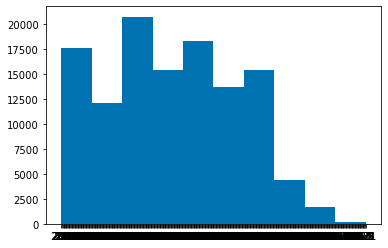

In [7]:
plt.hist(x=df['maxtemp']);
# plt.show()

# Exercise 1

Create a histogram with another quantitative variable from our dataset.

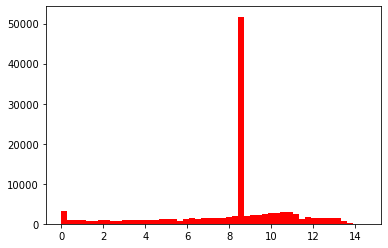

In [8]:
plt.hist(x=df['sunshine'], color= 'red', bins=50);

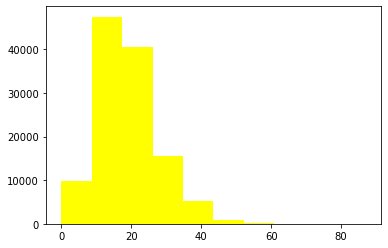

In [9]:
plt.hist(x=df['windspeed3pm'], color= 'yellow');

That's a nice and informative plot as it tells us upon first inspection that our data is normally distributed (i.e. it has an average where half of the data is on one side and the other half is on the other). What would make it even better is a bit more information though. Let's do that by passing in a few additional parameters to the hist and the plt functions.

- `bins=` --> will tell matplotlib how many bars we want in the distribution of the data
- `color=` --> allows us to change the color of the bars. You can find more about the [colors here](https://matplotlib.org/2.0.2/api/colors_api.html)
- `endgecolor=` --> allows us to give color to the edge of a figure
- `plt.title()` --> allows us to add a title to our graph

Text(0, 0.5, 'Frequency of the Temperature')

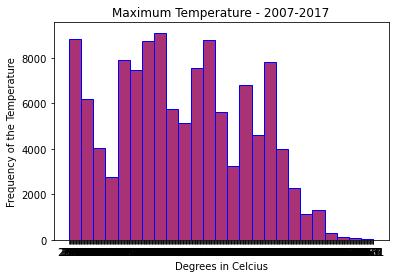

In [12]:
plt.hist(x=df['maxtemp'], color='#a83275', bins=25, edgecolor='blue')
plt.title('Maximum Temperature - 2007-2017')
plt.xlabel('Degrees in Celcius')
plt.ylabel('Frequency of the Temperature')
# plt.show()

# Exercise 2

- Create a histogram with a color of your choosing from the matplotlib color documentation
- Separate the edges with a different color
- Add labels to your chart and a title

Text(0, 0.5, 'Frequency from 2008 to 2017')

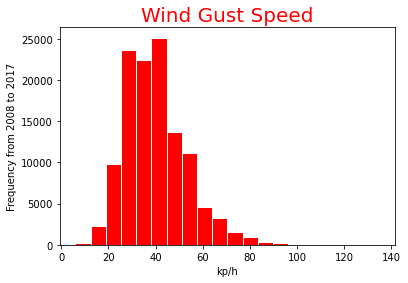

In [23]:
plt.hist(x=df['windgustspeed'], color= 'Red', bins=20, edgecolor='white')
plt.title('Wind Gust Speed', fontsize=20, color='Red')
plt.xlabel('kp/h')
plt.ylabel('Frequency from 2008 to 2017')

We could also show different distributions at the same time by adding multiple `plt.hist()`. For example, let's look at the `mintemp` as well, but this time, let's change a few other parameters inside our plots.

- `histtype=` --> provides us with different options on how to draw the histogram; the default is bar
- `alpha=` --> allows us to add transparency to our plots
- `fontdict=` --> we can pass in a dictionary containing the font for the title as well as a few other functionalities
- `plt.xlabel()` --> allows us to add a label to the x axis
- `plt.ylabel()` --> allows us to add a label to the y axis

Text(0, 0.5, 'Temperature Frequency in 10 Years')

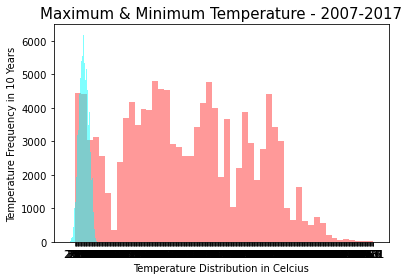

In [24]:
plt.hist(x=df['maxtemp'], color='red', bins=50, histtype='stepfilled', alpha=0.4)
plt.hist(x=df['mintemp'], color='cyan', bins=50, histtype='stepfilled', alpha=0.5)
plt.title('Maximum & Minimum Temperature - 2007-2017', fontdict={'fontsize': 15})
plt.xlabel('Temperature Distribution in Celcius')
plt.ylabel('Temperature Frequency in 10 Years')
# plt.show()

If we would like to see the legend of a variable we could add the `plt.legend()` to our set of options.

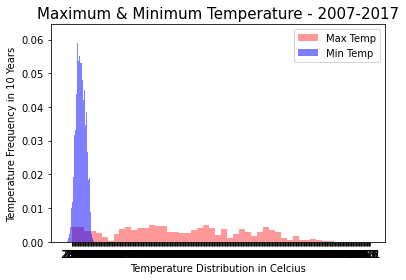

In [25]:
plt.hist(x=df['maxtemp'], color='red', bins=50, alpha=0.4, density=True, label='Max Temp')
plt.hist(x=df['mintemp'], color='blue', bins=50, alpha=0.5, density=True, label='Min Temp')
plt.title('Maximum & Minimum Temperature - 2007-2017', fontdict={'fontsize': 15})
plt.xlabel('Temperature Distribution in Celcius')
plt.ylabel('Temperature Frequency in 10 Years')
plt.legend()
# plt.show()

Let's visualise more data. Now, we will move on to scatter plots, which are a type of visualisation that allows us to see relationships between different variables. There are two ways of creating scatter plots in matplolib. One is by using `plt.scatter()` and the other is by using `plt.plot(x=, y=, 'o')`. Notice how the third parameter has no name, this is the way matplotlib deals with this functionality for plots. We will use `scatter` as it is more straightforward but the latter is more robust to large datasets, meaning, it handles large amounts of data better. This is because it does less computation behind the scenes. You can read more about this in the matplotlib's documentation.

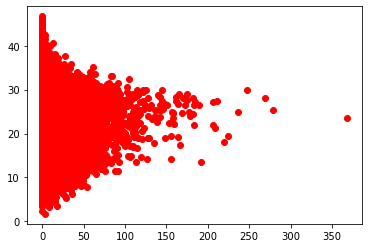

In [26]:
plt.scatter(x=df['rainfall'], y=df['temp3pm'], marker='o', color='red');
# plt.show()

Exercise 3
Create a scatterplot with any 2 qunatitative variables

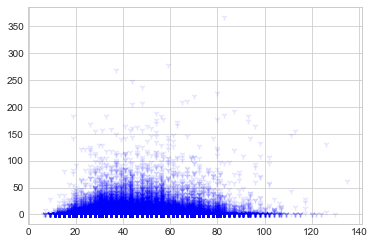

In [39]:
plt.scatter(x=df['windgustspeed'], y=df['rainfall'], marker='1', alpha=0.1, color='blue')

We can customise our plots again with a few additional parameters and plt calls. We can also apply a new plotting style to our visualisations.

- `marker=` --> picks the appropriate marker for our plot
- `s=` --> adjusts the size of our marker
- `plt.xlim()` --> allows us to customise the start and end points of the x axis. Notice how we are cutting some outliers below

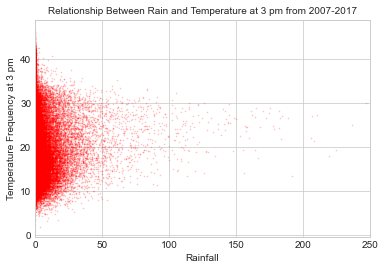

In [43]:
# new style
plt.style.use('seaborn-whitegrid')

# our plot
plt.scatter(x=df['rainfall'], y=df['temp3pm'], marker='.', color='red', alpha=0.2, s=1.5)
plt.xlim(0, 250)

# annotations
plt.title('Relationship Between Rain and Temperature at 3 pm from 2007-2017', fontdict={'fontsize': 10})
plt.xlabel('Rainfall')
plt.ylabel('Temperature Frequency at 3 pm')

# we can also save our figs with this command, dpi= manages the quality (the higher the better)
plt.savefig('my_cool_plot.png', dpi=700)

# showing our figure
# plt.show()

# Exercise 5
Create a scatterplot with 2 quantitative variables
- use a unique 

In [75]:
#using evaporation and sunshine
plt.style.use

<function matplotlib.style.core.use(style)>

# Second Approach - Object Oriented Approach

For the second we will be assigning two objects that come out of the `plt.subplots()` method, a figure and an axes object. The figure controls everything related to size, saving, and manipulating the figure as a whole. The axes object allows us to control everything that goes into the figure such as the type of plot, how many, and which customisations we would like to see. You can think of the `fig` object as our container and the `ax` object as our data.

Some of the commands in the previous approach have a slightly different call. Here are some of them:

- `plt.legend()` --> `ax.legend()`
- `plt.xlabel()` --> `ax.set_xlabel()`
- `plt.ylabel()` --> `ax.set_ylabel()`
- `plt.xlim()` --> `ax.set_xlim()`
- `plt.ylim()` --> `ax.set_ylim()`
- `plt.title()` --> `ax.set_title()`

To customise our charts we can take advantage of the following parameters and pass them through our `ax` object.

- `x=`
- `y=`
- `data=`
- `color=`
- `linestyle=`
- `linewidth=`
- `marker=`
- `markersize=`
- `markeredgecolor=`
- `markerfacewidth=`
- `markeredgewidth=`
- `alpha=`

A very useful way of visualising data is by aggregating it first. It doesn't change the parameters or the way we would create a visualisation with the regular dataset, but rather it helps us create very concise plots. Let's create a quick pivot table to see how the humidity changed throughout the day during the years for which we have data.

In [85]:
mask_2007 = df.year == 2007
np.mean(df.loc[mask_2007, ['humidity9am', 'year']])

humidity9am      69.557377
year           2007.000000
dtype: float64

In [88]:
mask_2007 = df.year == 2007
np.mean(df.loc[mask_2007, ['humidity9am', 'year']])

hum_by_year = df.pivot_table(
    index='year',
    values=['humidity9am', 'humidity3pm'],
)

hum_by_year

,humidity3pm,humidity9am
year,,
2007,45.786885,69.557377
2008,47.332949,63.953341
2009,49.350594,66.628160
2010,53.558432,70.557785
2011,53.310652,70.180336
2012,50.840558,68.487915
2013,49.540129,66.938126
2014,49.307430,67.150986
2015,49.572272,67.152625


## Exercise 6

Create a pivot table using 3 variables for the values
- Use 2 aggregation function
- For the index, use the days of the week

In [50]:
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'risk_mm', 'raintomorrow', 'month', 'year',
       'week', 'weekday', 'quarter', 'day_of_week', 'week_or_end', 'qtr_cate'],
      dtype='object')

In [52]:
quarter_windspeeds = df.quarter == 2007
np.mean(df.loc[quarter_windspeeds, ['windspeed9am', 'quarter']])

windspeed9am   NaN
quarter        NaN
dtype: float64

In [54]:
wind_by_quarter = df.pivot_table(
    index='quarter',
    values=['windspeed9am', 'windspeed3pm'],
    aggfunc=['count', 'mad']
)

wind_by_quarter

count                       mad             
        windspeed3pm windspeed9am windspeed3pm windspeed9am
quarter                                                    
1              30753        30753     6.446469     6.849326
2              30874        30874     6.575889     6.725725
3              29225        29225     7.140298     7.246695
4              28738        28738     6.740501     6.888182

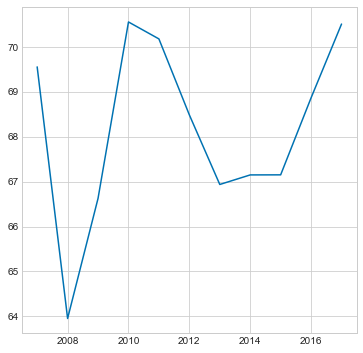

In [89]:
# Create the fig and ax objects
fig, ax = plt.subplots(figsize=(6,6))

# add data to the ax object
ax.plot(hum_by_year.index, hum_by_year['humidity9am'])
#plt.figure((figsize=5,6))
#show the fig
plt.show()

This plot is very nice and informative. Let's make it even better by adding the 3pm humidity variable to another `ax` object and by adding some labels and a marker for each.

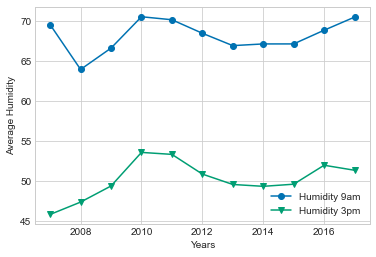

In [90]:
# Create the fig and ax objects
fig, ax = plt.subplots()

# add the 9am data and label to the ax object
ax.plot(hum_by_year.index, hum_by_year['humidity9am'], label='Humidity 9am', marker='o')
# add the 3pm data and label to the ax object
ax.plot(hum_by_year.index, hum_by_year['humidity3pm'], label='Humidity 3pm', marker='v')

ax.set_xlabel("Years")
ax.set_ylabel("Average Humidity")

fig.savefig('humidity_graph.png', dpi=500)

# show the legend with labels
plt.legend()
# show the fig
# plt.show()

Say we would like to show the distributions of our 4 temperature variables. If we were to do this in one single plot, this could result in a very busy plot that might be not be as informative as we want it to. Let's see what this would look like in one chart and then explore options for multiple plots.

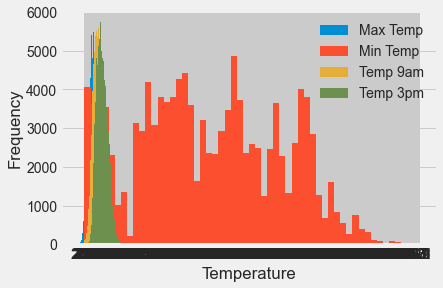

In [92]:
plt.style.use('fivethirtyeight')

# Create the fig and ax objects
fig, ax = plt.subplots()

# add the 9am data and label to the ax object
ax.hist(df['mintemp'], bins=55, label='Max Temp')
ax.hist(df['maxtemp'], bins=55, label='Min Temp')
ax.hist(df['temp9am'], bins=55, label='Temp 9am')
ax.hist(df['temp3pm'], bins=55, label='Temp 3pm')

ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")

# show the legend with labels
plt.legend()
# show the fig
# plt.show()

Not super informative right? What we could do insted is to create four figures showing the distributions of temperatures across our dataset. To do this, we will pass in the shape of our figure to our `.subplots()` method, and select the index of each figure as if we were doing so in a matrix, with slicers in our `ax` parameters. We will also add to our `.subplots()` method, the `sharey=True` to let matplotlib know that we want our for figures to share the same y axis. The next step we will take is to add a `figsize=` parameter to our figure to tinker with the size of the end result.

We will add color the same way we have done so above and we will make our figures a bit more transparent with the `alpha=` parameter of our `ax` objects.

Lastly, we will set the labels of each figure's x axis, and only the y axis with values in it. We will finish by adding a `fig.savefig()` to save our figure.

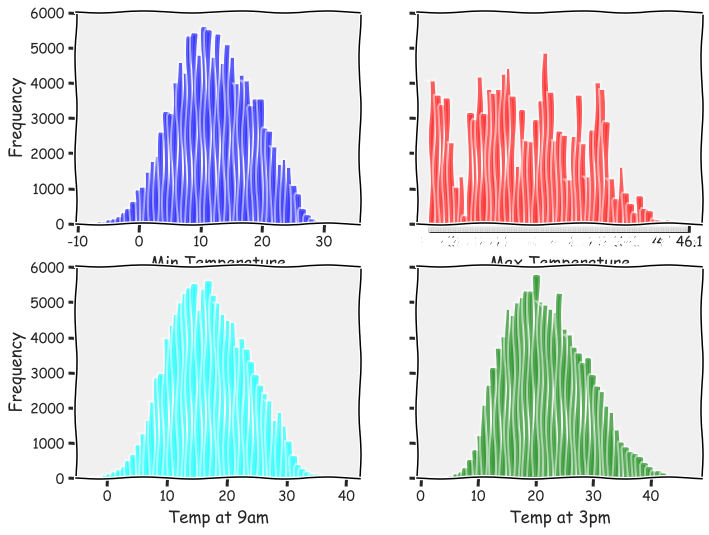

In [102]:
# cartoon style for fun : )
#plt.xkcd()
plt.style

# Create the fig and ax objects
fig, ax = plt.subplots(2, 2, sharey=True, figsize=(10, 8))

# add the 9am data and label to the ax object
ax[0, 0].hist(df['mintemp'], bins=55, color='blue', alpha=0.5)
ax[0, 1].hist(df['maxtemp'], bins=55, color='red', alpha=0.5)
ax[1, 0].hist(df['temp9am'], bins=55, color='cyan', alpha=0.5)
ax[1, 1].hist(df['temp3pm'], bins=55, color='green', alpha=0.5)


# ax.set(title="Distributions of Temperatures between 2007-2017")
ax[0, 0].set_xlabel("Min Temperature")
ax[0, 1].set_xlabel("Max Temperature")
ax[1, 0].set_xlabel("Temp at 9am")
ax[1, 1].set_xlabel("Temp at 3pm")
ax[0, 0].set_ylabel("Frequency")
ax[1, 0].set_ylabel("Frequency")

fig.savefig('temp_plots.png', dpi=300)

# show the fig
# plt.show()

This concludes our introduction to matplotlib and we will now move on to use its cousin, seaborn. We will continue to use both tools for the remainder of the course.

## Introduction to Static Visualisation with Seaborn

![seaborn](https://banner2.cleanpng.com/20181109/pi/kisspng-logo-image-python-font-product-spread-networks-and-seaborn-team-up-to-provide-sea-5be5f5e0aa1a53.8473640515417973446968.jpg)

**Source:** https://www.cleanpng.com/

Seaborn is a statistical data visualisation library built on top of matplotlib. It allows us to build build beautiful data visualisations with a relatively small amount of code.

Some of the characteristics of seaborn are:

- Beautiful visualisations
- Integrates very well with pandas
- Has a nickname too, `sns` :) 
- To use it in a session you have to import matplotlib as well
- `plt.show()` has to be used as well to render the plots
- Seaborn works better with tidy datasets


Let's begin by importing seaborn, matplotlib, pandas, and numpy with their industry alias, and by using our matplotlib magic command.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

%matplotlib inline

In [9]:
# We will load our ready-to-go dataset again
df = pd.read_csv('weather_ready.csv', parse_dates=['date'])

In [42]:
# Gonna reload the dataset into my vaiable
Monch_df = pd.read_csv('weather_ready.csv', parse_dates=['date'])

In [10]:
df.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,risk_mm,raintomorrow,month,year,week,weekday,quarter,day_of_week,week_or_end,qtr_cate
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,0.0,No,12,2008,49,0,4,Monday,Weekday,fourth_Q
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.6,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,0.0,No,12,2008,49,1,4,Tuesday,Weekday,fourth_Q
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.6,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,0.0,No,12,2008,49,2,4,Wednesday,Weekday,fourth_Q
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.6,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,1.0,No,12,2008,49,3,4,Thursday,Weekday,fourth_Q
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.6,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,12,2008,49,4,4,Friday,Weekday,fourth_Q


In [43]:
df.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,risk_mm,raintomorrow,month,year,week,weekday,quarter,day_of_week,week_or_end,qtr_cate
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,0.0,No,12,2008,49,0,4,Monday,Weekday,fourth_Q
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.6,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,0.0,No,12,2008,49,1,4,Tuesday,Weekday,fourth_Q
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.6,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,0.0,No,12,2008,49,2,4,Wednesday,Weekday,fourth_Q
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.6,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,1.0,No,12,2008,49,3,4,Thursday,Weekday,fourth_Q
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.6,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,12,2008,49,4,4,Friday,Weekday,fourth_Q


In [11]:
df.isna().sum()

date             0
location         0
mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustdir      0
windgustspeed    0
winddir9am       0
winddir3pm       0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
raintoday        0
risk_mm          0
raintomorrow     0
month            0
year             0
week             0
weekday          0
quarter          0
day_of_week      0
week_or_end      0
qtr_cate         0
dtype: int64

The first method we will use is the `.countplot()` method, which allows us to count data as a categorical variables and visualise it as a bar plot. The parameters we will need are:

- `x=` --> this is our variable of interest
- `data=` --> our dataframe with the x variable above
- `plt.xticks(rotation=45)` --> allows us to rotate the labels of our columns when they don't fit

Notice how seaborn uses the name of our variable as the `x` axis label and the count word for our `y` axis.

In [18]:
# sns.set_style('whitegrid')
sns.set_palette('colorblind')

plt.rcParams['figure.figsize'] = [6.0, 6.0] #control the width and height of all figures
plt.rcParams['figure.dpi'] = 100 #control the quality of all figures, Higher is better

%config InlineBackend.figure_format = 'retina'

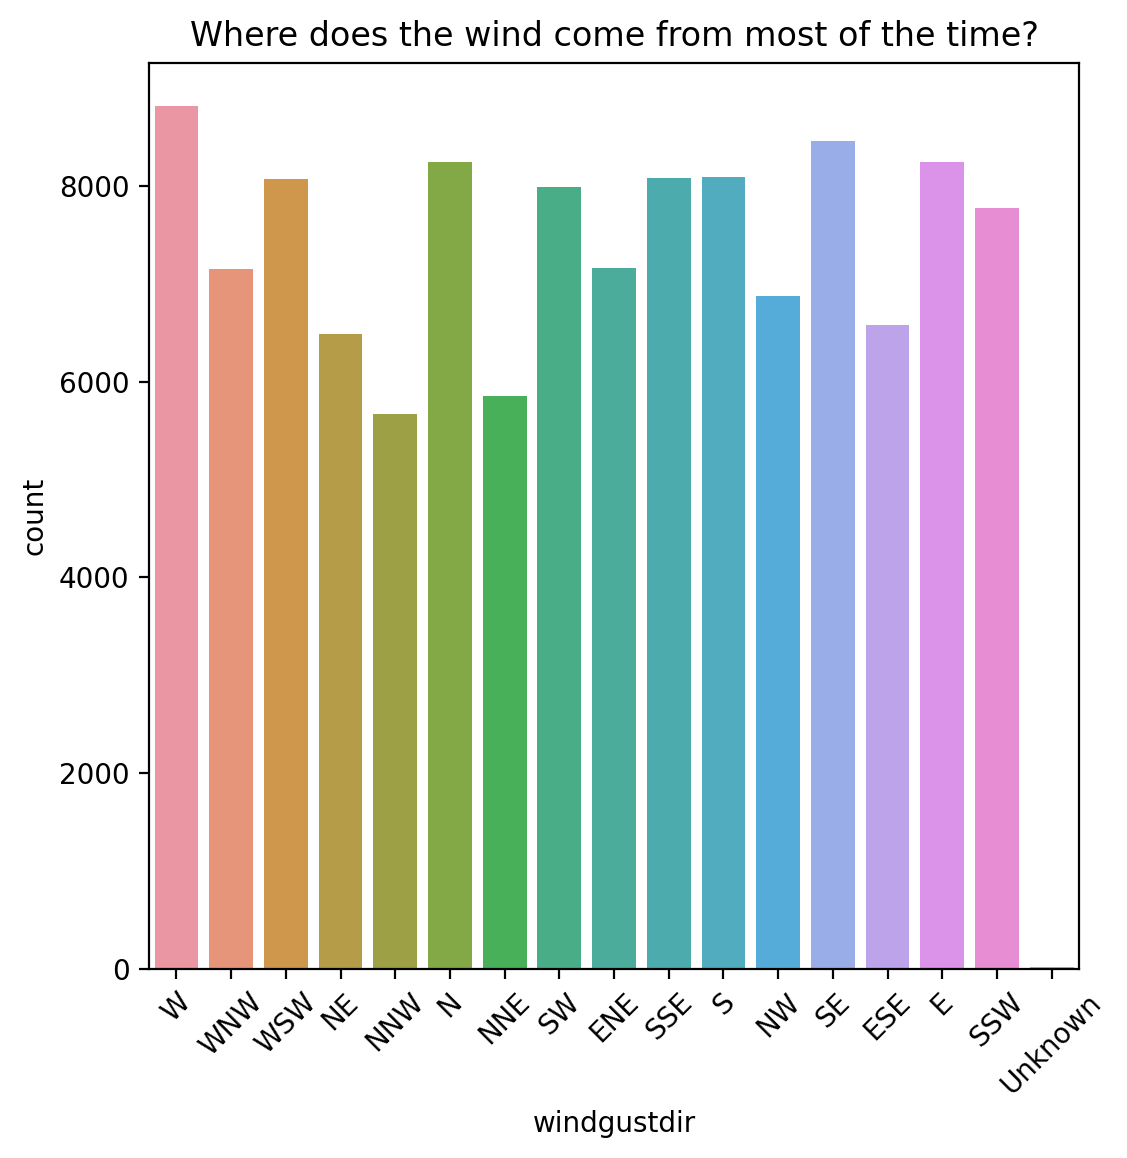

In [20]:
sns.countplot(x='windgustdir', data=df)
plt.xticks(rotation=45)
plt.title("Where does the wind come from most of the time?")
plt.savefig('wheredoesthewind.png', dpi=900)

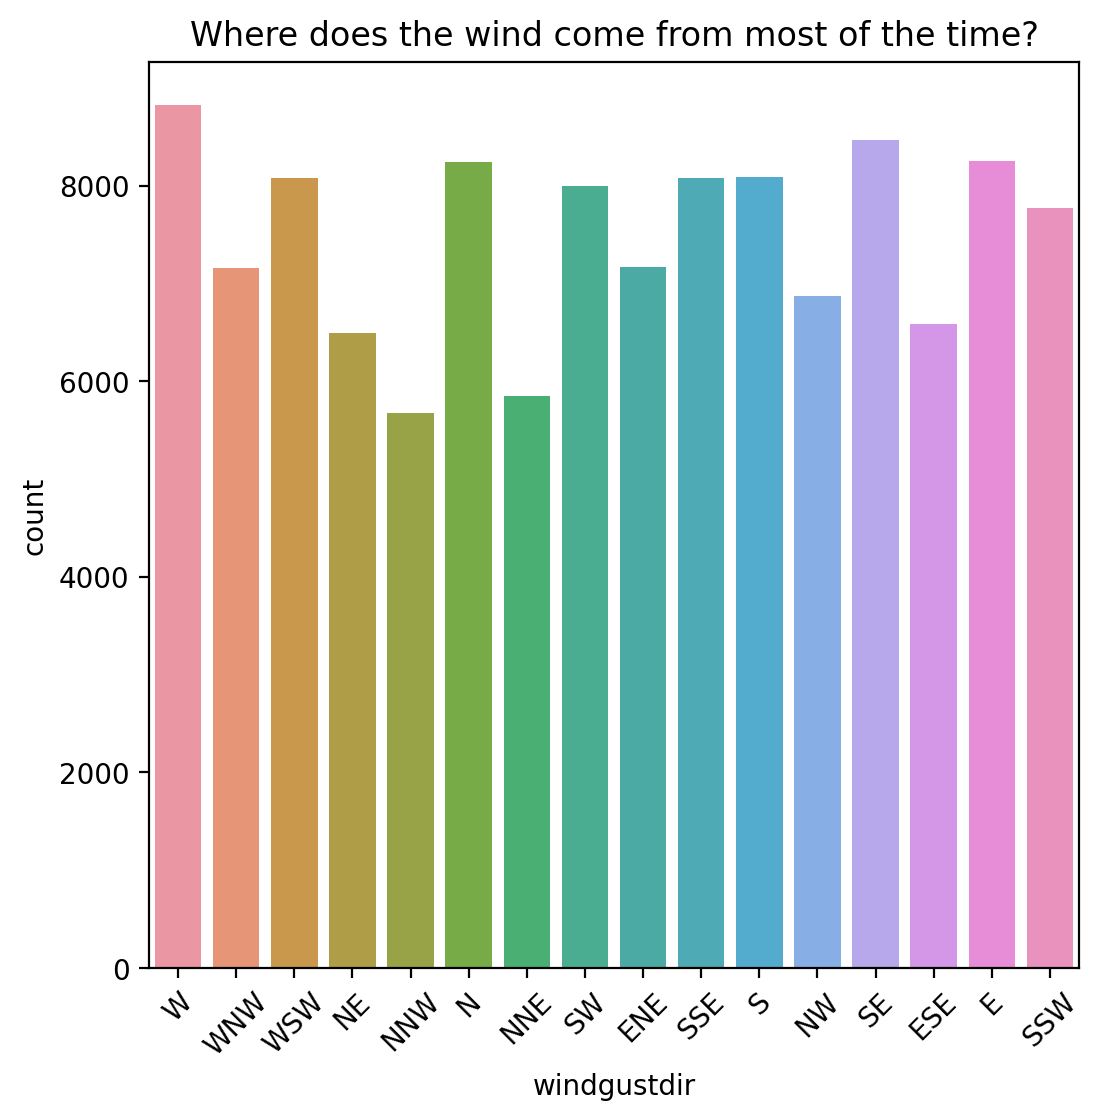

In [21]:
sns.countplot(x='windgustdir', data=df [df['windgustdir'] != "Unknown"])
plt.xticks(rotation=45)
plt.title("Where does the wind come from most of the time?")
plt.savefig('wheredoesthewind2.png', dpi=900)

We can also slice or filter our dataframe as we pass it through the `.countplot()` method. Here we only want to see the rainy days in Sydney for the year 2016.

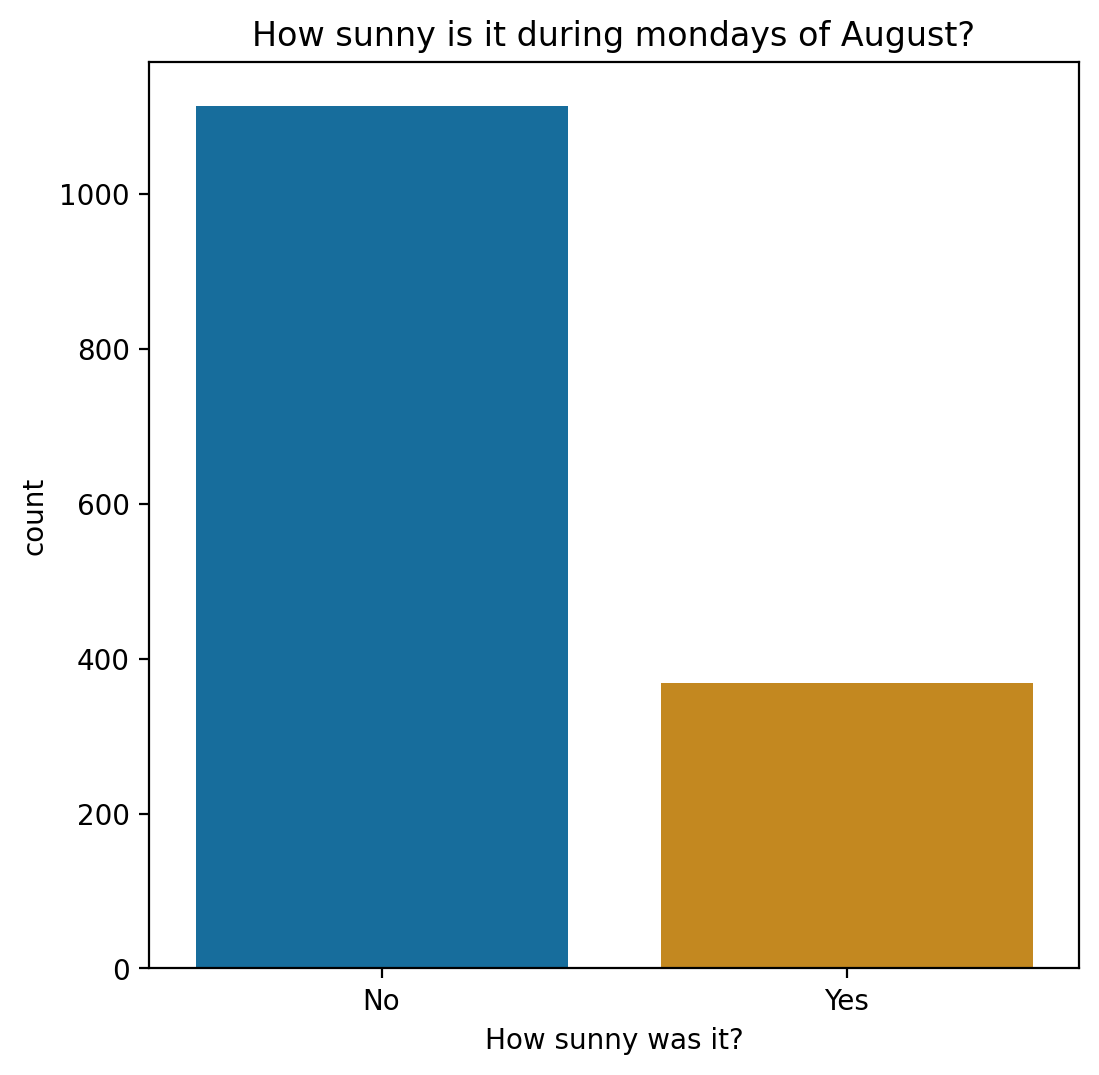

In [26]:
sns.countplot(x='raintoday', # my variable
              data=df[(df['day_of_week'] == 'Monday') & (df['month'] == 8)]) # my day vs month

# 
plt.xlabel("?")
plt.title("How many days did it rain in Sydney in 2016?")


plt.show()
plt.savefig('diditraintoday.png', dpi=700)

Another way to visualise categorical data with seaborn is by using the `.catplot()` method. This time we need to make sure we pass in the parameter `kind=` to our `sns` call and specify which measure we would like to see.

Let's create a subset of the data for the year 2016 and visualise the `raintomorrow` variable.

## Exercise

- Create a bar chart witha  acategorial variable
- Add a title
- Add axes labels


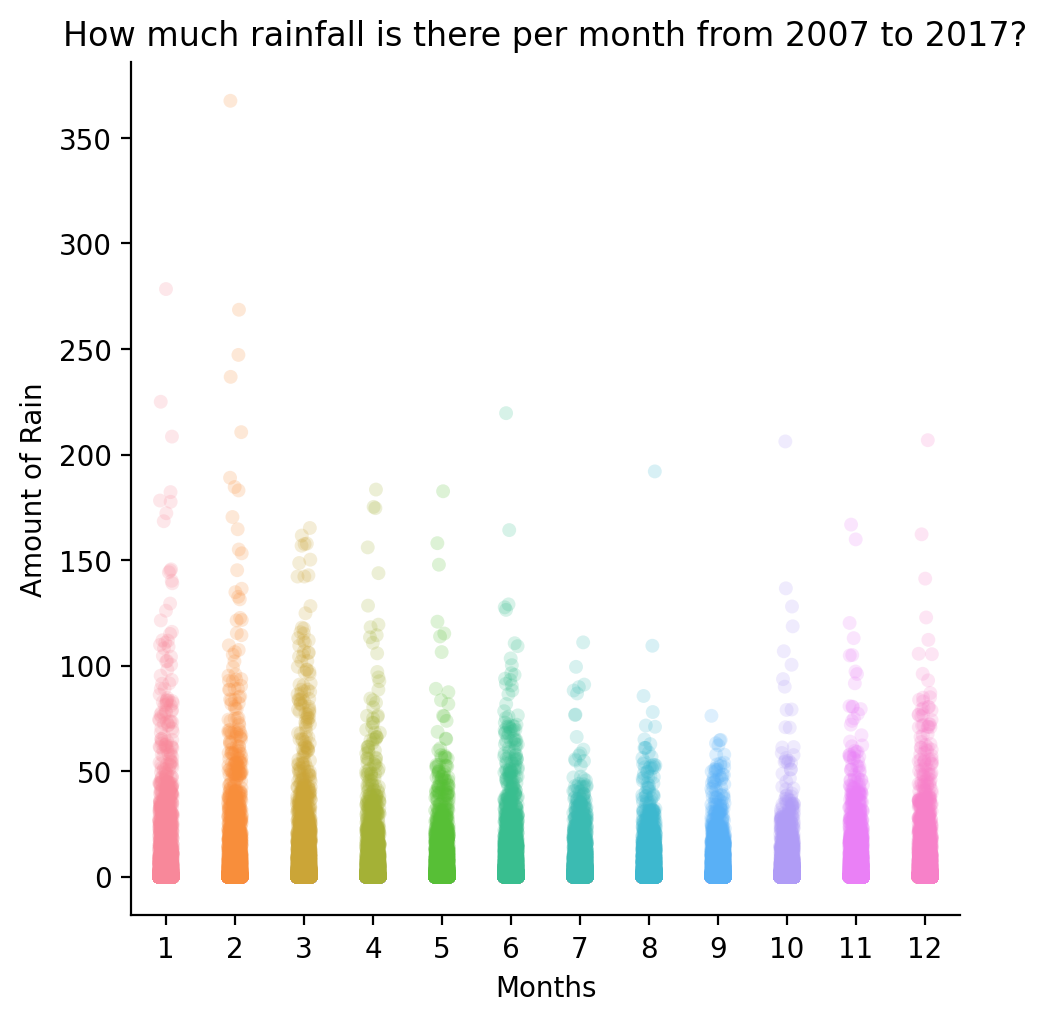

In [41]:
#Calplot exercise
sns.catplot(x='month', y='rainfall', data=df, alpha=0.2, kind='strip', )

# Here is the labels
plt.title("How much rainfall is there per month from 2007 to 2017?")
plt.xlabel("Months")
plt.ylabel("Amount of Rain")

plt.show()

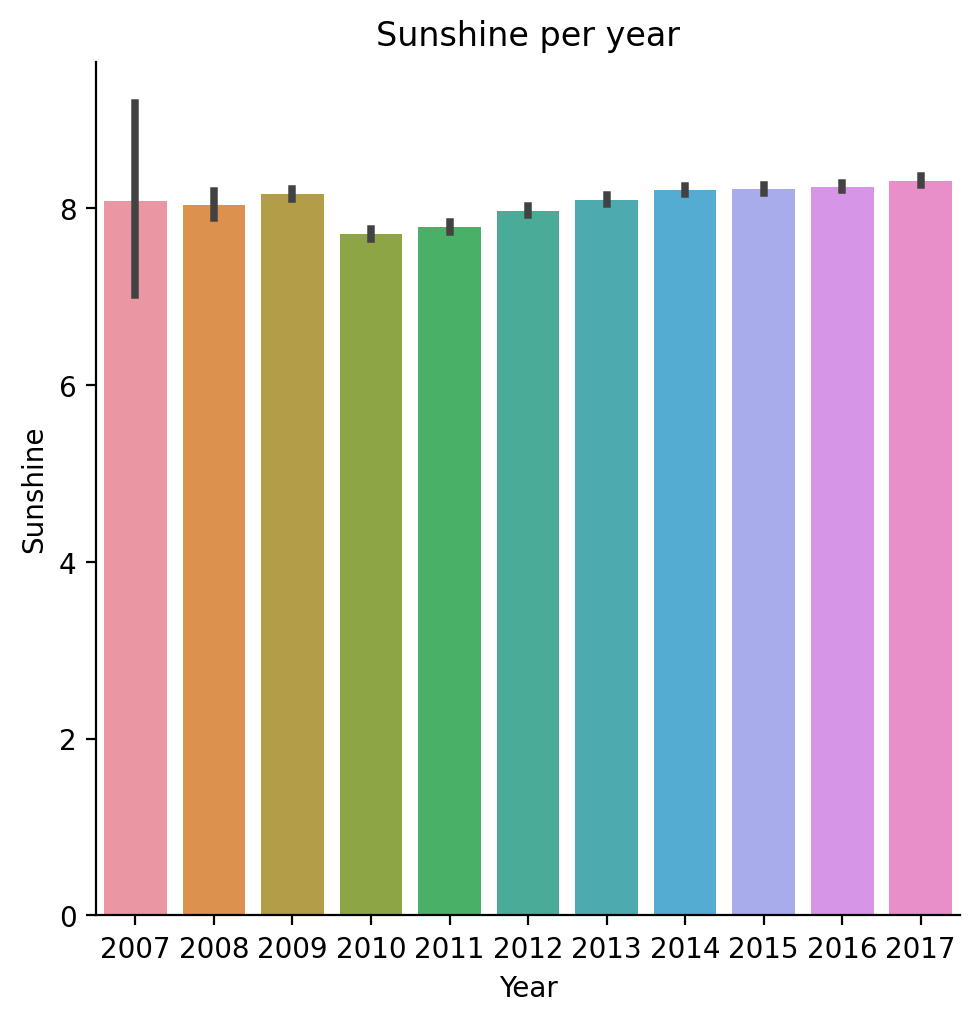

In [36]:
sns.catplot(x='year', y='sunshine', data=df, kind='bar')
plt.xlabel("Year")
plt.ylabel("Sunshine")
plt.title("Sunshine per year")
plt.show()

In [56]:
Data_2012 = df.year == 2012
np.mean(df.loc[Data_2012, ['rainfall', 'month']])

Rainfall_2012 = df.pivot_table(
    index='month',
    values=['rainfall'],
)

Rainfall_2012.head(12)

,rainfall
month,
1,2.733758
2,3.107581
3,2.831360
4,2.287474
5,1.975278
6,2.714866
7,2.133592
8,2.038784
9,1.832726


In [57]:
#Data_2012 = df.year == 2012
#np.mean(df.loc[Data_2012, ['rainfall', 'month']])

#Rainfall_2012 = df.pivot_table(
#    index='month',
#    values=['rainfall'],
#)

#Rainfall_2012.head(12)

#Calplot exercise
sns.catplot(x='rainfall', y='month', data=Rainfall_2012, alpha=0.2, kind='strip', )

# Here is the labels
plt.title("Which months had the most rainfall in 2012?")
plt.xlabel("Months")
plt.ylabel("Amount of Rain")

plt.show()

ValueError: Could not interpret input 'month'

In [24]:
df.shape

(119590, 32)

In [23]:
mask_16 = (df['year'] == 2016)
df_2016 = df[mask_16].copy()
df_2016.shape

(14467, 32)

In [ ]:
df.head()

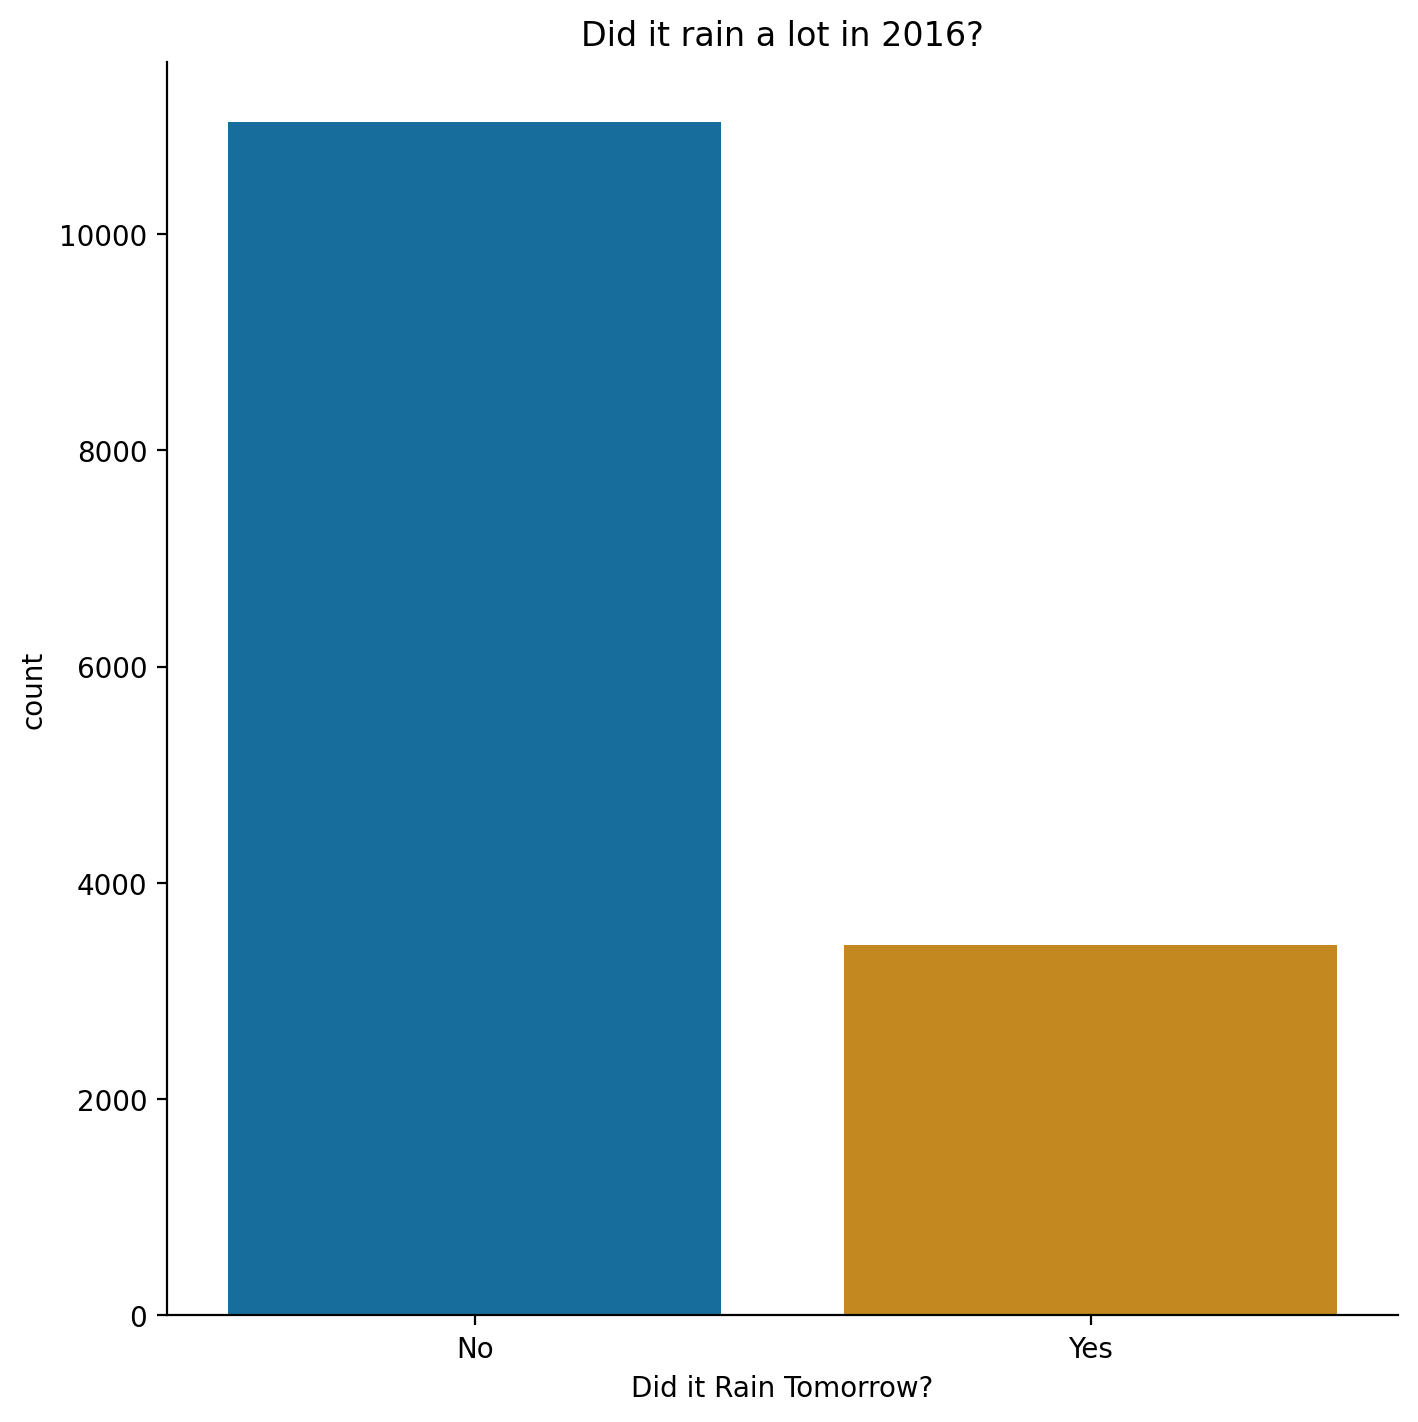

In [25]:
sns.catplot(x='raintomorrow', data=df_2016, kind='count', height=7)
plt.xlabel("Did it Rain Tomorrow?")
plt.title("Did it rain a lot in 2016?")
plt.show()

You can pass in several categorical variables to the `.catplot()` or even combine quantitative variable with categorical ones. In the example below we combine the `rainfall` and `day_of_week` variables to show an interesting comparison. The little bars at the top are the confidence intervals, which we will discuss in more depth on lesson 5.

In [ ]:
sns.catplot(x='day_of_week', y='rainfall', data=df_2016, kind='bar')
plt.xlabel("Day of the Week")
plt.ylabel("Rainfall (inches)")
plt.title("Amount of rain in inches and per day in 2016")
plt.show()

Box plots are another great tool to show statistical distributions in the data. The box and whiskers hold 99% of the data. The top and bottom lines are the max and the min values, respectively, or the variable shown. The top and bottom of the box are the 75th and 25th percentiles, respectively, and the middle line is the median of the distribution.

Any points above the max and min of the distribution is consider an outlier. An extreme number that could be due to many things, such as errors of measurement, actual observation, wrong missing value, and a few others. We will talk more about outliers in lesson 5.

In [ ]:
sns.catplot(x='day_of_week', 
            y='maxtemp', 
            data=df_2016[df['location'] == 'Melbourne'], 
            kind='box')

# information about the chart
plt.xticks(rotation=45)
plt.xlabel("Day of the Week")
plt.ylabel("Max Temp")
plt.title("Distribution of the Max Temp in the weekdays of 2016")


plt.show()

In [ ]:
df_2016.loc[df['location'] == 'Melbourne'].describe().T

We can arange a palette of colors to match a category in a variable, pass it into our `sns` plot and get a nice color split.

In [ ]:
palette_colors = {'Weekend': "green", 'Weekday': "blue"}

sns.countplot(x='raintoday', 
              data=df[(df['location'] == 'Sydney') & (df['year'] == 2016)],
              hue='week_or_end', 
              palette=palette_colors)

plt.title("Did it rain a lot in Sydney in 2016?")

plt.show()

Another very useful tool in seaborn is the `.scatterplot()` method. It is very versitile and straightforward to use and it allows us to see the correlation between two quantitative variables. To use it we pass in:

- `x=` --> this is one variable of interest
- `y=` --> this is another variable of interest
- `data=` --> our dataframe with the x and y variable above

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(x='week', y='maxtemp', data=df[(df['location'] == 'Perth') &
                                                   (df['year'] == 2017)])
plt.title("Are warm days correlated with high temperatures?")
plt.show()

We can split the plots in the data by adding the name of a categorical variable to the `hue=` parameter. This will split the data into a number of colors equal to the amount of categories in the variable. This is a great feature for scatterplots.

In [ ]:
df.shape[0] * 0.05

In [ ]:
sns.scatterplot(x='week', 
                y='maxtemp', 
                data=df[(df['location'] == 'Perth') & (df['year'] == 2016)], # Perth again
                hue='quarter') # colors the data by a categorical variable


plt.xlabel("Humidity at 9am")
plt.ylabel("Humidity at 3pm")
plt.title("If it is humid in the mornig will it be humid in the afternoon?")


plt.show()

Another method to display relational plots is the `.relplot()`. Like the `.catplot()` method, it requires that we pass in a `kind=` parameter with the word `'scatter'` to it, and it will provide us with the same result but with the added benefit of having more flexibility. For example, if we would like to split a scatterplot by the categories of a variable, we could do so with `col=` parameter and by passing the categorical variable to it.

In [ ]:
sns.relplot(x='rainfall', 
            y='windspeed9am', 
            data=df_2016, 
            kind='scatter',
            col='week_or_end')
plt.show()

We can add even more by using the `row=` parameter and another categorical variable.

In [ ]:
sns.relplot(x='rainfall', 
            y='windspeed9am', 
            data=df_2016, 
            kind='scatter',
            col='week_or_end',
            row='raintomorrow')
plt.show()

Seaborn also gives us the option to enlarge quantitative variable by a category variable using the `size=` parameter. Let's create a dataframe less rain outliers and see what the data looks like.

In [ ]:
outliers = (df_2016['rainfall'] < 60)

df_2016_no_outliers = df_2016[outliers]
df_2016_no_outliers.shape

In [ ]:
sns.relplot(x='rainfall', 
            y='maxtemp', 
            data=df_2016_no_outliers.sample(frac=0.2), 
            kind='scatter',
            hue='weekday',
            size='weekday')
plt.show()

Lastly, we can also create trend lines with `.relplot()` by specifying the parameter `kind=` to `'line'`. By default `sns` will show the confidence interval of the values in our trend. This means that we can be 95% confident the average rain in a given month will be within the shaded areas.

In [ ]:
sns.relplot(x='month', y='rainfall', data=df_2016, kind='line')
plt.xlabel('Months of 2016')
plt.ylabel('Rain in inches')
plt.title("Precipitation Monthly Trend in 2016")
plt.show()

By adding a `style=` and `hue=` parameter with a categorical variable, we can show even more patterns in the data. Setting `ci=` to False will remove the confidence interval lines that are added to line plots by default.

In [ ]:
sns.relplot(x='month', y='rainfall', data=df_2016, 
            kind='line', style='week_or_end', hue='week_or_end', 
            markers=True, ci=False)


plt.xlabel('Months of 2016')
plt.ylabel('Rain in inches')
plt.title("Precipitation Monthly Trend by Week or W-End in 2016")

plt.savefig("more_trends", dpi=350)
plt.show()

In [ ]:
df.head()

We can also combine scatterplots with histograms with the `sns.jointplot()`. In the next example, we will use a smaller fraction of the dataset.

In [ ]:
sns.jointplot(x='windgustspeed', y='pressure3pm', data=df.sample(frac=0.01), height=7)

We can split the distributions even further by passing in the a categorical variable to the `hue=` argument.

In [ ]:
sns.jointplot(x='windgustspeed', y='pressure3pm', data=df.sample(frac=0.01), hue='week_or_end', height=7)

To see the interplay between different quantitative variables, we can use the `sns.pairplot()` method.

In [ ]:
sns.pairplot(df[['windgustspeed', 'maxtemp', 'mintemp']].sample(frac=0.01), height=7)

Let's make play some violing music now.

In [ ]:
sns.catplot(y='windgustspeed', x='weekday', data=df, kind='violin', height=8)

# Exercise

Find another combination of quantitative and qualitative variables and create a violin plot.

# Awesome Work! Now Head to Notebook 10 to Learn About Interactive Data Visualisation